In [1]:
import os
import subprocess
from a_driver_utilities import *
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *

Setting environment for Precision WorkStation for Alex Newberry


In [3]:
all_nissl_stacks

[]

In [2]:
all_stacks

[]

/home/alexn/brainDev/src/utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-pac

Setting environment for Precision WorkStation for Alex Newberry
2028
990


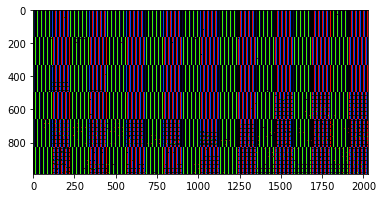

In [8]:
%matplotlib inline

import bloscpack as bp
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import argparse

#import matplotlib.pyplot as plt
from PyQt4.QtCore import *
from PyQt4.QtGui import *
from multiprocess import Pool

sys.path.append( os.path.join(os.environ['REPO_DIR'] , 'utilities') )
sys.path.append( os.path.join(os.environ['REPO_DIR'] , 'gui', 'widgets') )
sys.path.append( os.path.join(os.environ['REPO_DIR'] , 'gui') )

from utilities2015 import *
from metadata import *
from data_manager import *
from registration_utilities import find_contour_points
from gui_utilities import *
from qt_utilities import *
from preprocess_utilities import *

# import QtGui
def qimage_to_numpy_(image):
    # Convert a QImage to a numpy array
    image = image.convertToFormat( QImage.Format_ARGB32)
    width = image.width()
    height = image.height()
    ptr = image.constBits()

    return np.frombuffer(ptr.asstring(image.byteCount()), dtype=np.uint8).reshape(height, width, 4) 

def disp_qimg( qImg ):
    plt.imshow( qimage_to_numpy_(qImg) )
    plt.show()

def get_fp( section, prep_id='None', resol='thumbnail', version='NtbNormalized' ):
    return DataManager.get_image_filepath_v2(stack=stack, 
                          section=section, prep_id=prep_id,
                          resol=resol, version=version)

stack = 'DK18'

# we want to load RED and BLUE channels overlayed
# fp_curr_red = get_fp( 'DK17_18_slide109_2019_03_11-S2' )
# fp_prev_blue = get_fp( 'DK17_18_slide108_2019_03_11-S4' )
fp_curr_red = get_fp( 217 )
fp_prev_blue = get_fp( 216 )
# Load the images themselves
img_curr_red = cv2.imread( fp_curr_red )
img_prev_blue = cv2.imread( fp_prev_blue )
        
height_r, width_r, _ = img_curr_red.shape
height_b, width_b, _ = img_prev_blue.shape
new_height = max(height_r, height_b)
new_width = max(width_r, width_b)

img_combined = np.ones((new_height, new_width, 3))
img_combined[0:height_r, 0:width_r, 0] += img_curr_red[:,:,0]
img_combined[0:height_r, 0:width_r, 1] += img_curr_red[:,:,0]
img_combined[0:height_b, 0:width_b, 2] += img_prev_blue[:,:,0]

img_combined = img_combined
print new_width
print new_height

# print(type(img_combined))
# print(vars(QImage))

# Create a "qImg" which allows you to create a QPixmap from a matrix
bytesPerLine = 3 * new_width
qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, QImage.Format_RGB888)

disp_qimg(qImg) 

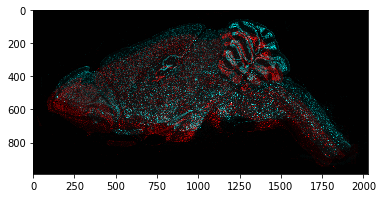

In [11]:
img = np.array(img_combined, dtype=np.uint8) # This line only change the type, not values
#img *= 256 # Now we get the good values in 16 bit format

bytesPerLine = 3 * new_width

qImg = QImage(img.data, new_width, new_height, 
                      bytesPerLine, QImage.Format_RGB888)
disp_qimg(qImg) 

In [2]:
rows = new_width
cols = new_height

buf = bytestream.read(rows * cols )
data = numpy.frombuffer(buf, dtype=numpy.uint8)
data = data.reshape( rows, cols, 1)

NameError: name 'bytestream' is not defined

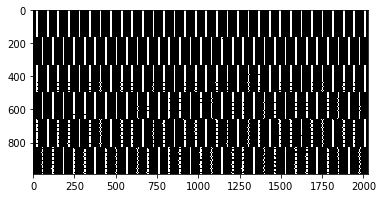

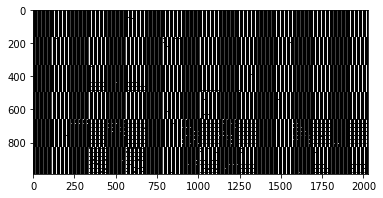

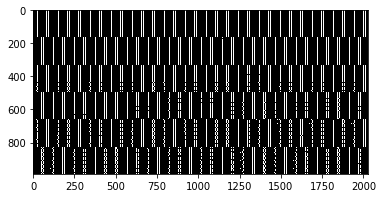

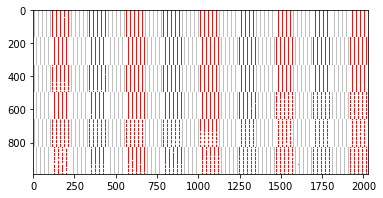

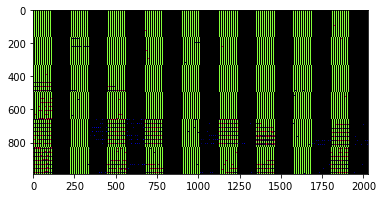

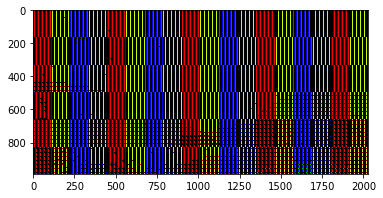

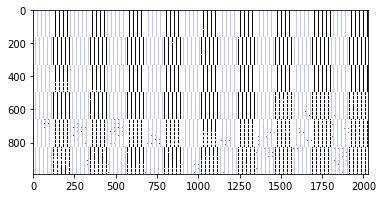

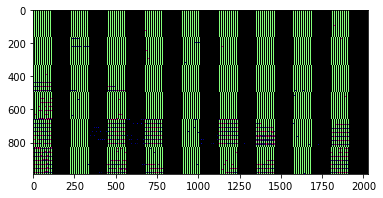

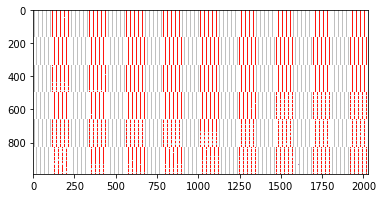

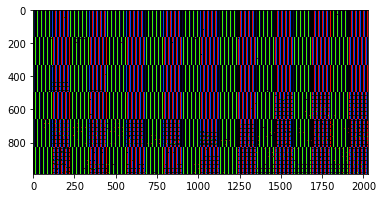

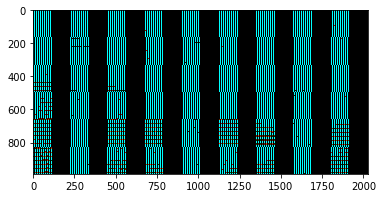

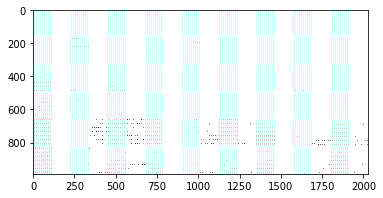

In [ ]:
bytesPerLine = 3 * new_width

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 2)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 3)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 1)
disp_qimg(qImg)

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 8)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 7)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 9)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 10)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 11)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 12)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 13)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 14)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 15)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 16)
disp_qimg(qImg) 

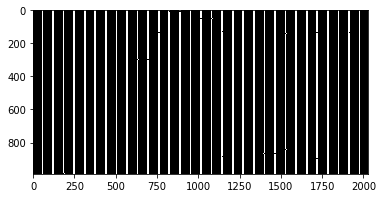

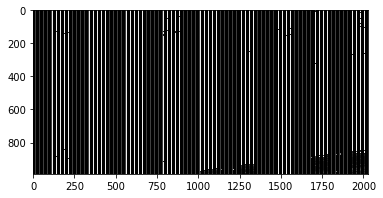

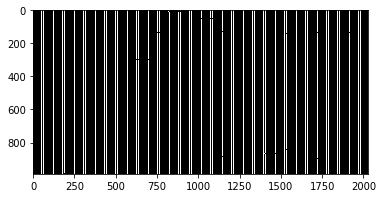

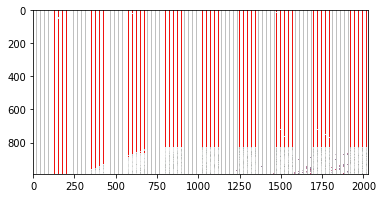

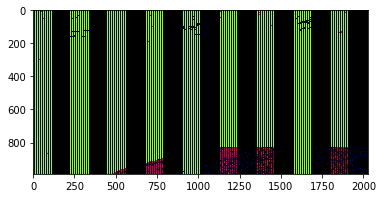

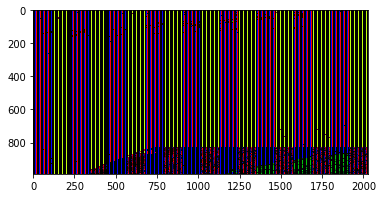

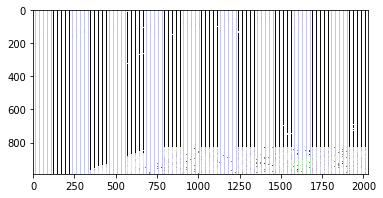

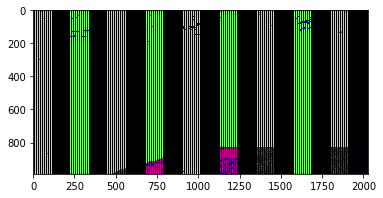

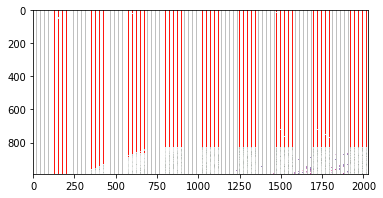

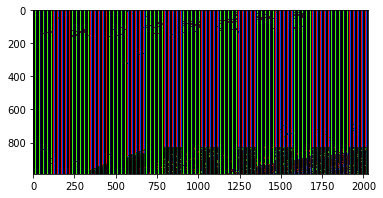

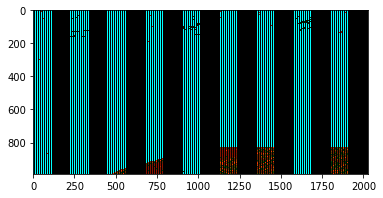

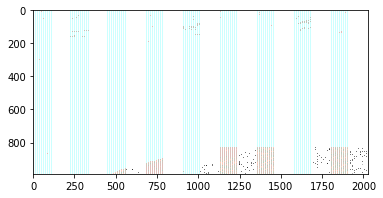

In [ ]:
bytesPerLine = 4 * new_width

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 2)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 3)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 1)
disp_qimg(qImg)

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 8)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 7)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 9)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 10)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 11)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 12)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 13)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 14)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 15)
disp_qimg(qImg) 

qImg = QImage(img_combined.data, new_width, new_height, 
                      bytesPerLine, 16)
disp_qimg(qImg) 

In [10]:
qImg.toImage()

AttributeError: 'QImage' object has no attribute 'toImage'

In [1]:
import os, cv2
print cv2.__version__
import numpy as np

3.2.0


In [ ]:
from a_bioformats_utilities import *
clean_up_tiff_directory2('/media/alexn/Data_2/czi_convert_test/tiffs/fftest/')

KeyboardInterrupt: 

In [ ]:
tiff_target_folder = '/media/alexn/Data_2/czi_convert_test/tiffs/f-test/'
for tiff_fn in os.listdir(tiff_target_folder):
        # Do nothing if expected patterns don't show up in the file
        if not '.czi' in tiff_fn or not '.tiff' in tiff_fn:
            continue
        
        # Remove unwanted symbols and whatnot
        new_fn = tiff_target_folder + tiff_fn.replace('.czi #','')
        # Read the image we just extracted
        img = cv2.imread( tiff_target_folder + tiff_fn )
        print np.shape(img)

(26051, 18743, 3)


In [2]:
tiff_target_folder = '/media/alexn/Data_2/czi_convert_test/tiffs/f-test/'
for tiff_fn in os.listdir(tiff_target_folder):
        # Do nothing if expected patterns don't show up in the file
        if not '.czi' in tiff_fn or not '.tiff' in tiff_fn:
            continue
        break
        # Remove unwanted symbols and whatnot
        new_fn = tiff_target_folder + tiff_fn.replace('.czi #','')
        # Read the image we just extracted
        img = cv2.imread( tiff_target_folder + tiff_fn )
        # Save the image in its proper format
        cv2.imwrite(new_fn, img[:,:,0] )
        
        del img
        os.remove( tiff_target_folder+tiff_fn )

In [3]:
# Remove unwanted symbols and whatnot
new_fn = tiff_target_folder + tiff_fn.replace('.czi #','')
# Read the image we just extracted
img = cv2.imread( tiff_target_folder + tiff_fn )
# Save the image in its proper format
#cv2.imwrite(new_fn, img[:,:,0] )

In [1]:
# -*- coding: utf-8 -*-
"""
@author: Sebi
File: convert_czi2tiff.py
Date: 11.08.2017
Version. 0.1
"""

import os
from czifile import czi2tif
import numpy as np
print(np.__version__)
print(np.__path__)

rootdir = r'c:\Users\M1SRH\Documents\Testdata_Zeiss\Atomic\Trainingsdaten_Spine_Detection\CZI'
extensions = ('.czi')
#extensions = ('.czi', '.lsm')

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        ext = os.path.splitext(file)[-1].lower()
        if ext in extensions:
            czi2process = os.path.join(subdir, file)
            # Save processed image
            tiff2save = os.path.splitext(czi2process)[0] + '.tiff'
            print('Converting to TIFF --> ', tiff2save)
            czi2tif(czi2process, tiffile=tiff2save, bigtiff=True, truncate=True)

print('Done.')

1.14.1
['/usr/local/lib/python2.7/dist-packages/numpy']
Done.


In [8]:
import os
from czifile import czi2tif
import numpy as np
print(np.__version__)
print(np.__path__)

rootdir = '/media/alexn/Data_2/czi_convert_test/czi_file/'
extensions = ('.czi')
#extensions = ('.czi', '.lsm')

czi_file = '/media/alexn/Data_2/czi_convert_test/czi_file/DK17_18_slide003_2019_03_10.czi'
tiff_file = '/media/alexn/Data_2/czi_convert_test/czi_file/test.tiff'
czi2tif(czi_file, tiffile=tiff_file, bigtiff=True, truncate=True)

# for subdir, dirs, files in os.walk(rootdir):
#     for file in files:
#         ext = os.path.splitext(file)[-1].lower()
#         if ext in extensions:
#             czi2process = os.path.join(subdir, file)
#             # Save processed image
#             tiff2save = os.path.splitext(czi2process)[0] + '.tiff'
#             print('Converting to TIFF --> ', tiff2save)
#             czi2tif(czi2process, tiffile=tiff2save, bigtiff=True, truncate=True)

print('Done.')

1.14.1
['/usr/local/lib/python2.7/dist-packages/numpy']

Opening CZI file... 0.029682 s
Image
  axes:  SCYX
  shape: (3, 2, 27916, 85062)
  dtype: uint16
  size:  26.54 GiB
Creating empty TIF file... 0.004821 s
Copying image from CZI to TIF file... 0.565029 s
Done.


In [9]:
czi2tif(czi_file, tiffile=tiff_file, bigtiff=False, truncate=True)


Opening CZI file... 0.030626 s
Image
  axes:  SCYX
  shape: (3, 2, 27916, 85062)
  dtype: uint16
  size:  26.54 GiB
Creating empty TIF file... 

error: 'I' format requires 0 <= number <= 4294967295

In [10]:
czi2tif(czi_file, tiffile=tiff_file, bigtiff=True, truncate=False)


Opening CZI file... 0.035102 s
Image
  axes:  SCYX
  shape: (3, 2, 27916, 85062)
  dtype: uint16
  size:  26.54 GiB
Creating empty TIF file... 0.005433 s
Copying image from CZI to TIF file... 0.474470 s


In [29]:
import bioformats as bf
import javabridge
javabridge.start_vm(class_path=bioformats.JARS)
import numpy as np

czi_fp = '/media/alexn/Data_2/czi_convert_test/czi_file/DK17_18_slide003_2019_03_10.czi'


In [28]:
czi_file = bf.load_image(czi_fp)

In [33]:
img = bf.load_image(czi_fp, c=0, series=0)

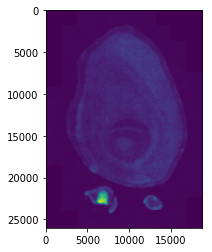

In [35]:
plt.imshow(img[32::,32::])

In [36]:
bf.write_image( '/media/alexn/Data_2/czi_convert_test/czi_file/pytest.tiff', img, bf.PT_UINT8,  )

In [32]:
np.shape(czi_file)

(26051, 18743, 2)

In [17]:
import javabridge
import bioformats
import os
javabridge.start_vm(class_path=bioformats.JARS)
classpath = javabridge.JClassWrapper('java.lang.System').getProperty('java.class.path')
for path in classpath.split(os.pathsep):
    print ("exists: " if os.path.isfile(path) else "missing: ") + path

exists: /usr/local/lib/python2.7/dist-packages/javabridge/jars/rhino-1.7R4.jar
exists: /usr/local/lib/python2.7/dist-packages/javabridge/jars/runnablequeue.jar
exists: /usr/local/lib/python2.7/dist-packages/javabridge/jars/cpython.jar
exists: /usr/local/lib/python2.7/dist-packages/bioformats/jars/loci_tools.jar


In [34]:
%matplotlib inline

import bloscpack as bp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os

def get_npz_data(filename):
    filename = filename+'.npz'
    filecontents = np.load(filename)
    data = filecontents['data']
    del filecontents
    return data


def blosc_to_npz(filename):
    file = filename+".bp";

    a = bp.unpack_ndarray_file(file)
    b = np.asarray(a)

    np.savez(filename+'.npz', data=b) # Save matrix as .npz file

    print('Size of bloscpack data:')
    print(np.shape(b))
    print('')

In [2]:
fp = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_simple_global_registration/'

fn_bp = fp+'MD585_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol'
blosc_to_npz(fn_bp)
bp_data = get_npz_data(fn_bp)

fn_txt = fp+'MD585_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.txt'
with open(fn_txt, 'r') as f:
    txt_data = f.read()

Size of bloscpack data:
(3, 4)



In [3]:
txt_data

'9.957628415962908042e-01 9.196917506527528541e-02 2.970581763418408700e-04 1.157742821683286365e+03\n-9.196356050396195525e-02 9.957288472309472338e-01 -8.295808654387434866e-03 4.974433550092178962e+02\n-1.058745899152585762e-03 8.233322559311261751e-03 9.999655451348088420e-01 4.660000000000000000e+02\n'

In [4]:
bp_data

array([[ 9.87916129e-01,  9.44360157e-02,  1.22908160e-01,
         1.15309838e+03],
       [-1.01927052e-01,  9.93206524e-01,  5.61540982e-02,
         5.29968802e+02],
       [-1.16770942e-01, -6.80018059e-02,  9.90829182e-01,
         4.26000000e+02]])

In [15]:
! tree /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/ | grep -v '.jp2' | grep -v '.tif' | grep -v '.bp' | grep -v '.ini' | grep -v '.json' | grep -v '.txt' | grep -v '.jpg' | grep -v '.png' | grep -v '.pkl' | grep -v '.csv' | grep -v '.dump'

│   ├── DK8_raw_jp2
│   │   ├── DK8-F100-2019.03.30-19.39.19_DK 8_1_0298_lossless.jp2
│   │   ├── DK8-F100-2019.03.30-19.39.19_DK 8_2_0299_lossless.jp2
│   │   ├── DK8-F100-2019.03.30-19.39.19_DK 8_3_0300_lossless.jp2
│   │   ├── DK8-F101-2019.03.30-19.56.28_DK 8_1_0301_lossless.jp2
│   │   ├── DK8-F101-2019.03.30-19.56.28_DK 8_2_0302_lossless.jp2
│   │   ├── DK8-F101-2019.03.30-19.56.28_DK 8_3_0303_lossless.jp2
│   │   ├── DK8-F10-2019.03.29-04.34.23_DK 8_1_0028_lossless.jp2
│   │   ├── DK8-F10-2019.03.29-04.34.23_DK 8_2_0029_lossless.jp2
│   │   ├── DK8-F10-2019.03.29-04.34.23_DK 8_3_0030_lossless.jp2
│   │   ├── DK8-F102-2019.03.30-20.12.27_DK 8_1_0304_lossless.jp2
│   │   ├── DK8-F102-2019.03.30-20.12.27_DK 8_2_0305_lossless.jp2
│   │   ├── DK8-F102-2019.03.30-20.12.27_DK 8_3_0306_lossless.jp2
│   │   ├── DK8-F103-2019.03.30-20.29.50_DK 8_1_0307_lossless.jp2
│   │   ├── DK8-F103-2019.03.30-20.29.50_DK 8_2_0308_lossless.jp2
│   │   ├── DK8-F103-2019.03.30-20.29.50_DK 8_3_0309_lossle

In [14]:
import os

def tree(dir, padding, print_files=False):
    cmd = "find '%s'" % dir
    files = os.popen(cmd).read().strip().split('\n')
    for file in files:
        level = file.count(os.sep)
        pieces = file.split(os.sep)
        symbol = {0:'', 1:'/'}[isdir(file)]
        
        if not print_files and symbol != '/':
            continue
            
        if '.jpg' in pieces[-1] or '.txt' in pieces[-1] or '.tif' in pieces[-1]\
            or '.json' in pieces[-1] or '.ini' in pieces[-1] or '.bp' in pieces[-1]:
            continue
            
        print padding*level + pieces[-1] + symbol
        
tree( '/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/', '|  ', True)

|  |  |  |  |  |  /
|  |  |  |  |  |  CSHL_simple_global_registration/
|  |  |  |  |  |  CSHL_scoremap_viz/
|  |  |  |  |  |  |  10.0um/
|  |  |  |  |  |  |  |  5N/
|  |  |  |  |  |  |  |  |  DK17/
|  |  |  |  |  |  |  |  |  |  detector799/
|  |  |  |  |  |  |  |  |  |  |  prep2/
|  |  |  |  |  |  |  |  SNR/
|  |  |  |  |  |  |  |  |  DK17/
|  |  |  |  |  |  |  |  |  |  detector999/
|  |  |  |  |  |  |  |  |  |  |  prep2/
|  |  |  |  |  |  |  |  |  |  detector799/
|  |  |  |  |  |  |  |  |  |  |  prep2/
|  |  |  |  |  |  DK17_18/
|  |  |  |  |  |  |  czi_raw_converted/
|  |  |  |  |  |  |  |  DK18_CFP/
|  |  |  |  |  |  |  |  DK17_AlexaFluor/
|  |  |  |  |  |  |  |  DK18_AlexaFluor/
|  |  |  |  |  |  |  |  DK17_CFP/
|  |  |  |  |  |  CSHL_scoremaps/
|  |  |  |  |  |  |  10.0um/
|  |  |  |  |  |  |  |  DK17/
|  |  |  |  |  |  |  |  |  DK17_prep2_10.0um_detector799/
|  |  |  |  |  |  |  |  |  |  DK17_18_slide133_2019_03_24-S3_prep2_10.0um_detector799/
|  |  |  |  |  |  |  |  |  |  DK17_1

|  |  |  |  |  |  |  |  DK8-F68-2019.03.30-06.58.45_DK 8_2_0203_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F106-2019.03.30-21.21.19_DK 8_2_0317_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F55-2019.03.29-23.00.03_DK 8_1_0163_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F45-2019.03.29-17.28.27_DK 8_2_0134_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F83-2019.03.30-13.45.25_DK 8_3_0249_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F70-2019.03.30-08.06.24_DK 8_1_0208_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F74-2019.03.30-10.11.35_DK 8_1_0220_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F42-2019.03.29-15.37.59_DK 8_3_0126_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F120-2019.03.31-16.46.28_DK 8_3_0360_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F103-2019.03.30-20.29.50_DK 8_1_0307_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F48-2019.03.29-18.42.52_DK 8_2_0143_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F19-2019.03.29-06.45.09_DK 8_2_0056_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F45-2019.03.29-17.28.27_DK 8_3_0135_lossy.jp2
|  |  |  |  |  |  |  |  DK8-F95-201

|  |  |  |  |  |  |  |  |  DK17_18_slide074_2019_02_28-S3/
|  |  |  |  |  |  |  |  |  |  DK17_18_slide074_2019_02_28-S3_prep1_thumbnail_autoSubmaskDecisions.csv
|  |  |  |  |  |  |  |  |  |  DK17_18_slide074_2019_02_28-S3_prep1_thumbnail_autoSubmask_0.png
|  |  |  |  |  |  |  |  |  DK17_18_slide005_2019_03_10-S1/
|  |  |  |  |  |  |  |  |  |  DK17_18_slide005_2019_03_10-S1_prep1_thumbnail_autoSubmask_1.png
|  |  |  |  |  |  |  |  |  |  DK17_18_slide005_2019_03_10-S1_prep1_thumbnail_autoSubmaskDecisions.csv
|  |  |  |  |  |  |  |  |  |  DK17_18_slide005_2019_03_10-S1_prep1_thumbnail_autoSubmask_0.png
|  |  |  |  |  |  |  |  |  |  DK17_18_slide005_2019_03_10-S1_prep1_thumbnail_autoSubmask_2.png
|  |  |  |  |  |  |  |  |  DK17_18_slide116_2019_03_11-S1/
|  |  |  |  |  |  |  |  |  |  DK17_18_slide116_2019_03_11-S1_prep1_thumbnail_autoSubmask_0.png
|  |  |  |  |  |  |  |  |  |  DK17_18_slide116_2019_03_11-S1_prep1_thumbnail_autoSubmaskDecisions.csv
|  |  |  |  |  |  |  |  |  DK17_18_slide00

|  |  |  |  |  |  |  |  |  |  DK17_18_slide059_2019_03_11-S1_prep1_thumbnail_userModifiedSubmask_2.png
|  |  |  |  |  |  |  |  |  |  DK17_18_slide059_2019_03_11-S1_prep1_thumbnail_userModifiedSubmaskDecisions.csv
|  |  |  |  |  |  |  |  |  |  DK17_18_slide059_2019_03_11-S1_prep1_thumbnail_userModifiedSubmask_1.png
|  |  |  |  |  |  |  |  |  |  DK17_18_slide059_2019_03_11-S1_prep1_thumbnail_userModifiedSubmask_0.png
|  |  |  |  |  |  |  |  |  |  DK17_18_slide059_2019_03_11-S1_prep1_thumbnail_userModifiedSubmaskContourVertices.pkl
|  |  |  |  |  |  |  |  |  DK17_18_slide220_2019_03_26-S3/
|  |  |  |  |  |  |  |  |  |  DK17_18_slide220_2019_03_26-S3_prep1_thumbnail_userModifiedSubmaskContourVertices.pkl
|  |  |  |  |  |  |  |  |  |  DK17_18_slide220_2019_03_26-S3_prep1_thumbnail_userModifiedSubmask_0.png
|  |  |  |  |  |  |  |  |  |  DK17_18_slide220_2019_03_26-S3_prep1_thumbnail_userModifiedSubmask_1.png
|  |  |  |  |  |  |  |  |  |  DK17_18_slide220_2019_03_26-S3_prep1_thumbnail_userMod

|  |  |  |  |  |  |  |  |  DK17_18_slide179_2019_03_24-S1_to_DK17_18_slide178_2019_03_24-S3/
|  |  |  |  |  |  |  |  |  |  elastix.log
|  |  |  |  |  |  |  |  |  DK17_18_slide127_2019_03_11-S3_to_DK17_18_slide127_2019_03_11-S1/
|  |  |  |  |  |  |  |  |  |  elastix.log
|  |  |  |  |  |  |  |  |  DK17_18_slide077_2019_02_28-S3_to_DK17_18_slide077_2019_02_28-S1/
|  |  |  |  |  |  |  |  |  |  elastix.log
|  |  |  |  |  |  |  |  |  DK17_18_slide127_2019_03_11-S1_to_DK17_18_slide126_2019_03_11-S3/
|  |  |  |  |  |  |  |  |  |  elastix.log
|  |  |  |  |  |  |  |  |  DK17_18_slide227_2019_03_26-S1_to_DK17_18_slide226_2019_03_26-S2/
|  |  |  |  |  |  |  |  |  |  elastix.log
|  |  |  |  |  |  |  |  |  DK17_18_slide012_2019_03_10-S3_to_DK17_18_slide011_2019_03_10-S3/
|  |  |  |  |  |  |  |  |  |  elastix.log
|  |  |  |  |  |  |  |  |  DK17_18_slide201_2019_03_26-S3_to_DK17_18_slide201_2019_03_26-S1/
|  |  |  |  |  |  |  |  |  |  elastix.log
|  |  |  |  |  |  |  |  |  DK17_18_slide196_2019_03_26-

In [1]:
from a_GUI_utilities_pipeline_status import *
sorted(necessary_image_files_by_script_ntb.keys())

Setting environment for Precision WorkStation for Alex Newberry


['  initial setup gui',
 ' a_script_preprocess_setup',
 'a_script_preprocess_1',
 'a_script_preprocess_2',
 'a_script_preprocess_3',
 'a_script_preprocess_4',
 'a_script_preprocess_5',
 'a_script_preprocess_6',
 'a_script_preprocess_7',
 'a_script_processing.',
 'a_script_processing_setup']

In [10]:
sorted(['  initial setup gui',
 ' a_script_preprocess_setup',
 'a_script_preprocess_1',
 'a_script_preprocess_2',
 'a_script_preprocess_3',
 'a_script_preprocess_4',
 'a_script_preprocess_5',
 'a_script_preprocess_6',
 'a_script_preprocess_7',
 'a_script_processing`',
 'a_script_processing_setup'])

['  initial setup gui',
 ' a_script_preprocess_setup',
 'a_script_preprocess_1',
 'a_script_preprocess_2',
 'a_script_preprocess_3',
 'a_script_preprocess_4',
 'a_script_preprocess_5',
 'a_script_preprocess_6',
 'a_script_preprocess_7',
 'a_script_processing_setup',
 'a_script_processing`']

In [1]:
'a_script_processing_setup'<'a_script_processing'

False

In [87]:
# x=! ps aux | grep 'python a_GUI_initial.py'
ps = subprocess.Popen(('ps','aux'), stdout=subprocess.PIPE)
output = subprocess.check_output(('grep', 'python a_GUI_initial.py'), stdin=ps.stdout)
python_GUI_initial_processes = output.split('\n')

for process_str in python_GUI_initial_processes:
    if 'grep' in process_str or process_str == '':
        continue
    else:
        p_id = process_str.split()[1]
        print p_id
        #! kill $p_id

9298
9659
9709
9774
9914


In [90]:
stack_metadata["MD635"]

{'cutting_plane': 'sagittal', 'resolution': 0.46, 'stain': 'ntb'}

In [88]:
python_GUI_initial_processes

['alexn     9298  0.0  0.0 754020 59880 pts/2    Tl   15:48   0:00 python a_GUI_initial.py',
 'alexn     9659  0.0  0.0 754020 59576 pts/2    Tl   16:03   0:00 python a_GUI_initial.py',
 'alexn     9709  0.0  0.0 754024 60040 pts/2    Tl   16:03   0:00 python a_GUI_initial.py',
 'alexn     9774  0.1  0.0 753620 59264 pts/2    Tl   16:04   0:00 python a_GUI_initial.py',
 'alexn     9914  1.0  0.0 754020 59572 pts/2    Tl   16:06   0:00 python a_GUI_initial.py',
 '']

In [83]:
process

''

In [81]:
python_GUI_initial_processes

['alexn     9298  0.0  0.0 754020 59880 pts/2    Tl   15:48   0:00 python a_GUI_initial.py',
 'alexn     9659  0.1  0.0 754020 59576 pts/2    Tl   16:03   0:00 python a_GUI_initial.py',
 'alexn     9709  0.1  0.0 754024 60040 pts/2    Tl   16:03   0:00 python a_GUI_initial.py',
 'alexn     9774  0.4  0.0 753620 59264 pts/2    Sl+  16:04   0:00 python a_GUI_initial.py',
 '']

In [77]:
! ps aux | grep 'python a_GUI_initial.py'

alexn     9298  0.0  0.0 754020 59880 pts/2    Tl   15:48   0:00 python a_GUI_initial.py
alexn     9648  0.0  0.0   4516   716 pts/6    Ss+  16:03   0:00 /bin/sh -c  ps aux | grep 'python a_GUI_initial.py'
alexn     9650  0.0  0.0  14232   936 pts/6    S+   16:03   0:00 grep python a_GUI_initial.py


In [73]:
ps = subprocess.Popen(('ps','aux'), stdout=subprocess.PIPE)
output = subprocess.check_output(('grep', 'python a_GUI_initial.py'), stdin=ps.stdout)

In [74]:
output

'alexn     9298  0.0  0.0 754020 59880 pts/2    Tl   15:48   0:00 python a_GUI_initial.py\n'

In [67]:
subprocess.call(['ps','aux','|','grep',cmd])

CalledProcessError: Command '['ls', '|', 'grep', 'a_']' returned non-zero exit status 2

In [64]:
cmd = "python a_GUI_initial.py"
cmd = '\"python a_GUI_initial.py\"'
subprocess.call(['ps','aux','|','grep',cmd])

0

In [52]:
subprocess.check_output(['ps','aux','|','grep','python a_GUI_initial.py'])

CalledProcessError: Command '['ps', 'aux', '|', 'grep', 'python a_GUI_initial.py']' returned non-zero exit status 1

In [41]:
x[0].split()[1]

'9281'

In [1]:
! which python

/home/alexn/brainDev/mousebrainatlas_virtualenv/bin/python


In [15]:
! ls /home/alexn/.local/lib/python2.7/site-packages/

chardet			 requests-2.21.0.dist-info  vtk
chardet-3.0.4.dist-info  tornado		    vtk-8.1.1.dist-info
idna			 tornado-4.5.3.dist-info    vtkVersion.py
idna-2.8.dist-info	 urllib3		    vtkVersion.pyc
requests		 urllib3-1.24.1.dist-info


In [13]:
! ls /usr/lib/python2.7/

chardet			 requests-2.21.0.dist-info  vtk
chardet-3.0.4.dist-info  tornado		    vtk-8.1.1.dist-info
idna			 tornado-4.5.3.dist-info    vtkVersion.py
idna-2.8.dist-info	 urllib3		    vtkVersion.pyc
requests		 urllib3-1.24.1.dist-info


In [5]:
! ls /home/alexn/brainDev/mousebrainatlas_virtualenv/lib/python2.7/site-packages/

backports				     PIL
backports.functools_lru_cache-1.5.dist-info  Pillow-5.4.1.dist-info
blosc					     pip
blosc-1.8.1.dist-info			     pip-19.0.3.dist-info
bloscpack				     pip-19.1.1.dist-info
bloscpack-0.9.0.dist-info		     pkg_resources
certifi					     _posixsubprocess32.so
certifi-2018.11.29.dist-info		     pylab.py
chardet					     pylab.pyc
chardet-3.0.4.dist-info			     PyMCubes-0.0.9.dist-info
cloudpickle				     pyparsing-2.3.1.dist-info
cloudpickle-0.8.0.dist-info		     pyparsing.py
cv2					     pyparsing.pyc
cycler-0.10.0.dist-info			     PyQt4
cycler.py				     python_dateutil-2.8.0.dist-info
cycler.pyc				     pytz
dask					     pytz-2018.9.dist-info
dask-1.1.3.dist-info			     PyWavelets-1.0.2.dist-info
dask-1.1.5.dist-info			     pywt
dask-1.2.0.dist-info			     randomcolor
dask-1.2.1.dist-info			     randomcolor-0.4.4.5.dist-info
dask-1.2.2.dist-info			     requests
dateutil				     requests-2.21.0.dist-info
decorator-4.3.2.dist-info		     scikit_image-0.14.2.dist-

In [16]:
! which python

/home/alexn/brainDev/mousebrainatlas_virtualenv/bin/python


In [18]:
from PyQt4.QtCore import *
from PyQt4.QtGui import *

In [21]:
import sys, os
sys.path

['',
 '/usr/local/lib/python2.7/dist-packages',
 '/home/yuncong/opencv/release/lib/python2.7/dist-packages',
 '/usr/local',
 '/home/alexn/mxnet/python',
 '/home/alexn/brainDev/demo',
 '/usr/lib/python2.7',
 '/usr/lib/python2.7/plat-x86_64-linux-gnu',
 '/usr/lib/python2.7/lib-tk',
 '/usr/lib/python2.7/lib-old',
 '/usr/lib/python2.7/lib-dynload',
 '/home/alexn/.local/lib/python2.7/site-packages',
 '/usr/local/lib/python2.7/dist-packages/PyMCubes-0.0.6-py2.7-linux-x86_64.egg',
 '/usr/lib/python2.7/dist-packages',
 '/usr/lib/python2.7/dist-packages/PILcompat',
 '/usr/lib/python2.7/dist-packages/gtk-2.0',
 '/usr/lib/python2.7/dist-packages/ubuntu-sso-client',
 '/usr/local/lib/python2.7/dist-packages/IPython/extensions',
 '/home/alexn/.ipython']

In [2]:
from PyQt4.QtCore import *
from PyQt4.QtGui import *

In [4]:
import os

fp = '/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/brains_info/x.ini'

configfile = "aoso"

mode = 'a' if os.path.exists(fp) else 'w'

with open(fp, mode) as configfile:
    config.write(configfile)

IOError: [Errno 2] No such file or directory: '/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/brains_info/x.ini'

In [6]:
os.path.exists('/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/brains_info/')

False

In [11]:
! ls /media/alexn/Data_2/

In [5]:
get_fn_list_from_sorted_filenames( "DK17" )

['DK17_18_slide001_2019_03_10-S1',
 'DK17_18_slide001_2019_03_10-S3',
 'DK17_18_slide003_2019_03_10-S1',
 'DK17_18_slide003_2019_03_10-S3',
 'DK17_18_slide004_2019_03_10-S1',
 'DK17_18_slide004_2019_03_10-S3',
 'DK17_18_slide005_2019_03_10-S1',
 'DK17_18_slide005_2019_03_10-S3',
 'DK17_18_slide006_2019_03_10-S1',
 'DK17_18_slide006_2019_03_10-S3',
 'DK17_18_slide007_2019_03_10-S3',
 'DK17_18_slide008_2019_03_10-S1',
 'DK17_18_slide008_2019_03_10-S3',
 'DK17_18_slide009_2019_03_10-S1',
 'DK17_18_slide009_2019_03_10-S3',
 'DK17_18_slide010_2019_03_10-S2',
 'DK17_18_slide011_2019_03_10-S1',
 'DK17_18_slide011_2019_03_10-S3',
 'DK17_18_slide012_2019_03_10-S3',
 'DK17_18_slide013_2019_03_10-S1',
 'DK17_18_slide013_2019_03_10-S3',
 'DK17_18_slide014_2019_03_10-S1',
 'DK17_18_slide014_2019_03_10-S3',
 'DK17_18_slide015_2019_03_10-S1',
 'DK17_18_slide015_2019_03_10-S3',
 'DK17_18_slide016_2019_03_10-S1',
 'DK17_18_slide016_2019_03_10-S3',
 'DK17_18_slide017_2019_03_10-S1',
 'DK17_18_slide017_2

In [2]:
! python a_script_rotate.py DK17 NTB

Setting environment for Precision WorkStation for Alex Newberry
{'TEST001': 0.46, 'MD585': 0.46, 'MD594': 0.46, 'MD589': 0.46, 'UCSD001': 0.325, 'DK17': 0.325}
No mcubes
Loaded data from saved metadata_cache for MD585
Loaded data from saved metadata_cache for MD589
Loaded data from saved metadata_cache for MD594
Loaded data from saved metadata_cache for UCSD001
Setting environment for Precision WorkStation for Alex Newberry
{'TEST001': 0.46, 'MD585': 0.46, 'MD594': 0.46, 'MD589': 0.46, 'UCSD001': 0.325, 'DK17': 0.325}
No mcubes
Loaded data from saved metadata_cache for MD585
Loaded data from saved metadata_cache for MD589
Loaded data from saved metadata_cache for MD594
Loaded data from saved metadata_cache for UCSD001
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DK17/DK17_sorted_filenames.txt
Traceback (most recent call last):
  File "warp_crop_v3.py", line 129, in <module>
    image_name_list = DataManager.load_sorted_filenames(stack=stack)[0].

In [5]:
os.environ['REPO_DIR']

'/home/alexn/brainDev'

In [24]:
import sys, os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from metadata import *
from preprocess_utilities import *
from data_manager import DataManager
from a_driver_utilities import *

fp='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/'
fns = ! ls $fp
sorted_fns_dk17 = DataManager.load_sorted_filenames("DK17")
sorted_fns_dk18 = DataManager.load_sorted_filenames("DK18")

Setting environment for Precision WorkStation for Alex Newberry
{'DK18': 0.325, 'MD635': 0.46, 'DK17': 0.325}


In [11]:
for sfn_fn in sorted_fns_dk17[0].keys():
    for fn in fns:
        # DK17 stuff
        if sfn_fn in fn and 'CFP' in fn:
            if not os.path.isfile("/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_CFP/"+fn):
                print fp+fn+" /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_CFP/"+fn
                ! cp "$fp$fn" "/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_CFP/$fn"
        if sfn_fn in fn and 'Alexa' in fn:
            if not os.path.isfile("/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_AlexaFluor/"+fn):
                print fp+fn+" /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_AlexaFluor/"+fn
                ! cp "$fp$fn" "/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_AlexaFluor/$fn"

/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_18_slide093_2019_02_28-S3-Alexa Fluor 568.tif /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_AlexaFluor/DK17_18_slide093_2019_02_28-S3-Alexa Fluor 568.tif
/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_18_slide093_2019_02_28-S3-CFP.tif /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_CFP/DK17_18_slide093_2019_02_28-S3-CFP.tif


In [6]:
fp='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/DK17_18/czi_raw_converted/DK17_CFP/'
fns = ! ls $fp

In [9]:
succ_fns = []
for sfn_fn in sorted_fns_dk17[0].keys():
    sfn_not_found=True
    for fn in fns:
        if sfn_fn in fn:
            succ_fns.append(fn)
            sfn_not_found=False
    if sfn_not_found:
        print sfn_fn

DK17_18_slide093_2019_02_11-S3


In [8]:
len(succ_fns)

380

In [67]:
len(succ_fns)

for succ_fn in succ_fns:
    for sfn_fn in sorted_fns[0].keys():
        if sfn_fn in succ_fn:
            print len(succ_fns)
            succ_fns.remove(succ_fn)

In [41]:
succ_fn

'DK17_18_slide188_2019_03_24-S3-CFP.tif'

In [15]:
len(sorted_fns_dk18[0].keys())

391

In [ ]:
'DK17_18_slide160_2019_03_24-S3': 320,
'DK17_18_slide165_2019_03_24-S3': 320,

In [26]:
len( set(sorted_fns[0].values()) )

381

In [27]:
len( set(sorted_fns[0].values()) )

381

In [16]:
{1:'a'}.values()

['a']

In [4]:
fp = DataManager.get_image_filepath_v2(stack, None, version=None, resol="raw", fn="$")

fp[:fp.index('$')]

'/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw/'

In [2]:
stack='UCSD001'

import os
import subprocess
import numpy as np
import scipy as sp

import sys
import json
import time
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from metadata import *
from preprocess_utilities import *
from data_manager import DataManager
from a_driver_utilities import *

sorted_fns = get_fn_list_from_sorted_filenames( stack )
img_fps = []
for fn in sorted_fns:
    img_fp = DataManager.get_image_filepath_v2(stack=stack, resol='thumbnail', \
                        prep_id=None, version='NtbNormalized', fn=fn)
    img_fps.append(img_fp)

img_fp = img_fps[200]
cerebellum_fp = '/home/alexn/Desktop/custom/cerebellum.tif'

img =  imread(img_fp)
cerebellum = imread(cerebellum_fp)[::,::,0]
cerebellum_mask = imread(cerebellum_fp)[::,::,1]
print np.shape(img)
print np.shape(cerebellum)

plt.imshow(cerebellum, cmap='gray')


ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.


Setting environment for Precision WorkStation for Alex Newberry
{'DK18': 0.325, 'DK17': 0.325}


/home/alexn/brainDev/src/utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-pac

_________________________________________________________________________________
_________________________________________________________________________________
"/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/UCSD001/UCSD001_sorted_filenames.txt" not found!

This file must be present for the pipeline to continue. Add the file and rerun the script.
_________________________________________________________________________________
_________________________________________________________________________________


Folder for stack MD585 not found, skipping.
Folder for stack MD589 not found, skipping.
Folder for stack MD590 not found, skipping.
Folder for stack MD591 not found, skipping.
Folder for stack MD592 not found, skipping.
Folder for stack MD593 not found, skipping.
Folder for stack MD594 not found, skipping.
Folder for stack MD595 not found, skipping.
Folder for stack MD598 not found, skipping.
Folder for stack MD599 not found, skipping.
Folder for stack MD602 not found, skipping.
Folder for stack MD603 not found, skipping.
Folder for stack MD635 not found, skipping.
Folder for stack MD653 not found, skipping.
Folder for stack MD652 not found, skipping.
Folder for stack MD642 not found, skipping.
Folder for stack MD657 not found, skipping.
Folder for stack MD658 not found, skipping.
Folder for stack MD661 not found, skipping.
Folder for stack MD662 not found, skipping.
Folder for stack CHATM2 not found, skipping.
Folder for stack CHATM3 not found, skipping.
Folder for stack UCSD001 not f

SystemExit: 

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


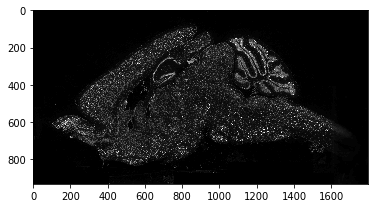

In [4]:
plt.imshow(img, cmap='gray')

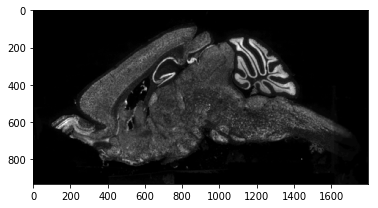

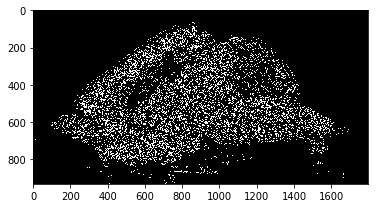

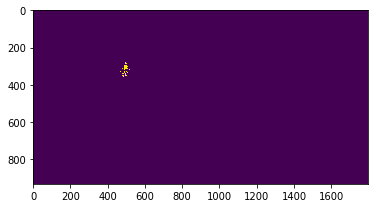

In [80]:
import cv2
img = cv2.imread(img_fp)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9, 9), 4)
edged = cv2.Canny(gray, 10, 7)

plt.imshow(gray, cmap='gray')
plt.show()
plt.imshow(edged, cmap='gray')
plt.show()

import imutils

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# ensure at least one contour was found
if len(cnts) > 0:
    # grab the largest contour, then draw a mask for the pill
    c = max(cnts, key=cv2.contourArea)
    mask = np.zeros(gray.shape, dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    
    # compute its bounding box of pill, then extract the ROI,
    # and apply the mask
    (x, y, w, h) = cv2.boundingRect(c)
    imageROI = img[y:y + h, x:x + w]
    maskROI = mask[y:y + h, x:x + w]
    imageROI = cv2.bitwise_and(imageROI, imageROI, mask=maskROI)

plt.imshow(mask)
plt.show()

In [73]:
edged

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

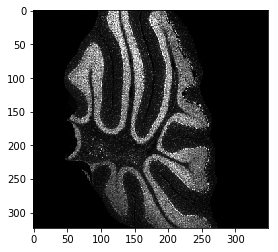

In [34]:
# ROTATION
cerebellum_rot = sp.ndimage.rotate(cerebellum, -30, reshape=False)

plt.imshow(cerebellum_rot, cmap='gray')

In [37]:
translation_lim = 400 # x + y can both shift by this many pixels
rotation_lim = 30 # -30 to +30 degrees rotated

translation_init = [200,1100]
rotation_init = 0

y_len,x_len = np.shape(cerebellum_mask)

for y in y_len:
    for x in x_len:
        # If this pixel is a part of the cerebellum mask
        if cerebellum_mask[y,x] == 255:
            do_stuff

In [38]:
y_len

323